In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import time
from iexfinance import stock

In [3]:
url = 'https://api.iextrading.com/1.0/stock'

In [4]:
stocks = ['STLD', 'NUE', 'CLF', 'RS']

In [6]:
start_date = pd.datetime(2018, 1 ,2)
end_date = pd.datetime(2018, 3, 31)
range_one = (pd.bdate_range(start_date, end_date)).tolist()
#dates = (range_one.strftime('%Y-%m-%d')).tolist()

close_dates = ['2018-01-15', '2018-02-19', '2018-03-30']

final_dates = []

for item in range_one:
    if item not in close_dates:
        final_dates.append(item)
        
instance_number = range(len(final_dates))

In [7]:
stock_data = []

for symbol in stocks: 
    for x in instance_number:
        query_url = requests.get(url + '/' + symbol + '/chart' + '/ytd').json()
        trade_date = query_url[x]['date']
        open_price = query_url[x]['open']
        close_price = query_url[x]['close']
        percent_change = query_url[x]['changePercent']
        
        stock_data.append({'Stock' : symbol, 'Date' : trade_date, 'Open' : open_price, 'Close' : close_price, 'Percent_Change' : percent_change})       

In [8]:
stock_df = pd.DataFrame(stock_data)

In [9]:
stock_final = stock_df.loc[(stock_df['Date'] >= '2018-03-01') & (stock_df['Date'] <= '2018-03-31')]

In [10]:
stock_final.head()

,Close,Date,Open,Percent_Change,Stock
40,47.8904,2018-03-01,47.4723,4.000,STLD
41,48.1194,2018-03-02,47.6813,0.478,STLD
42,47.1039,2018-03-05,47.8506,-2.110,STLD
43,46.7654,2018-03-06,47.2731,-0.719,STLD
44,47.1238,2018-03-07,46.8749,0.766,STLD


/Users/tamaradaniels/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


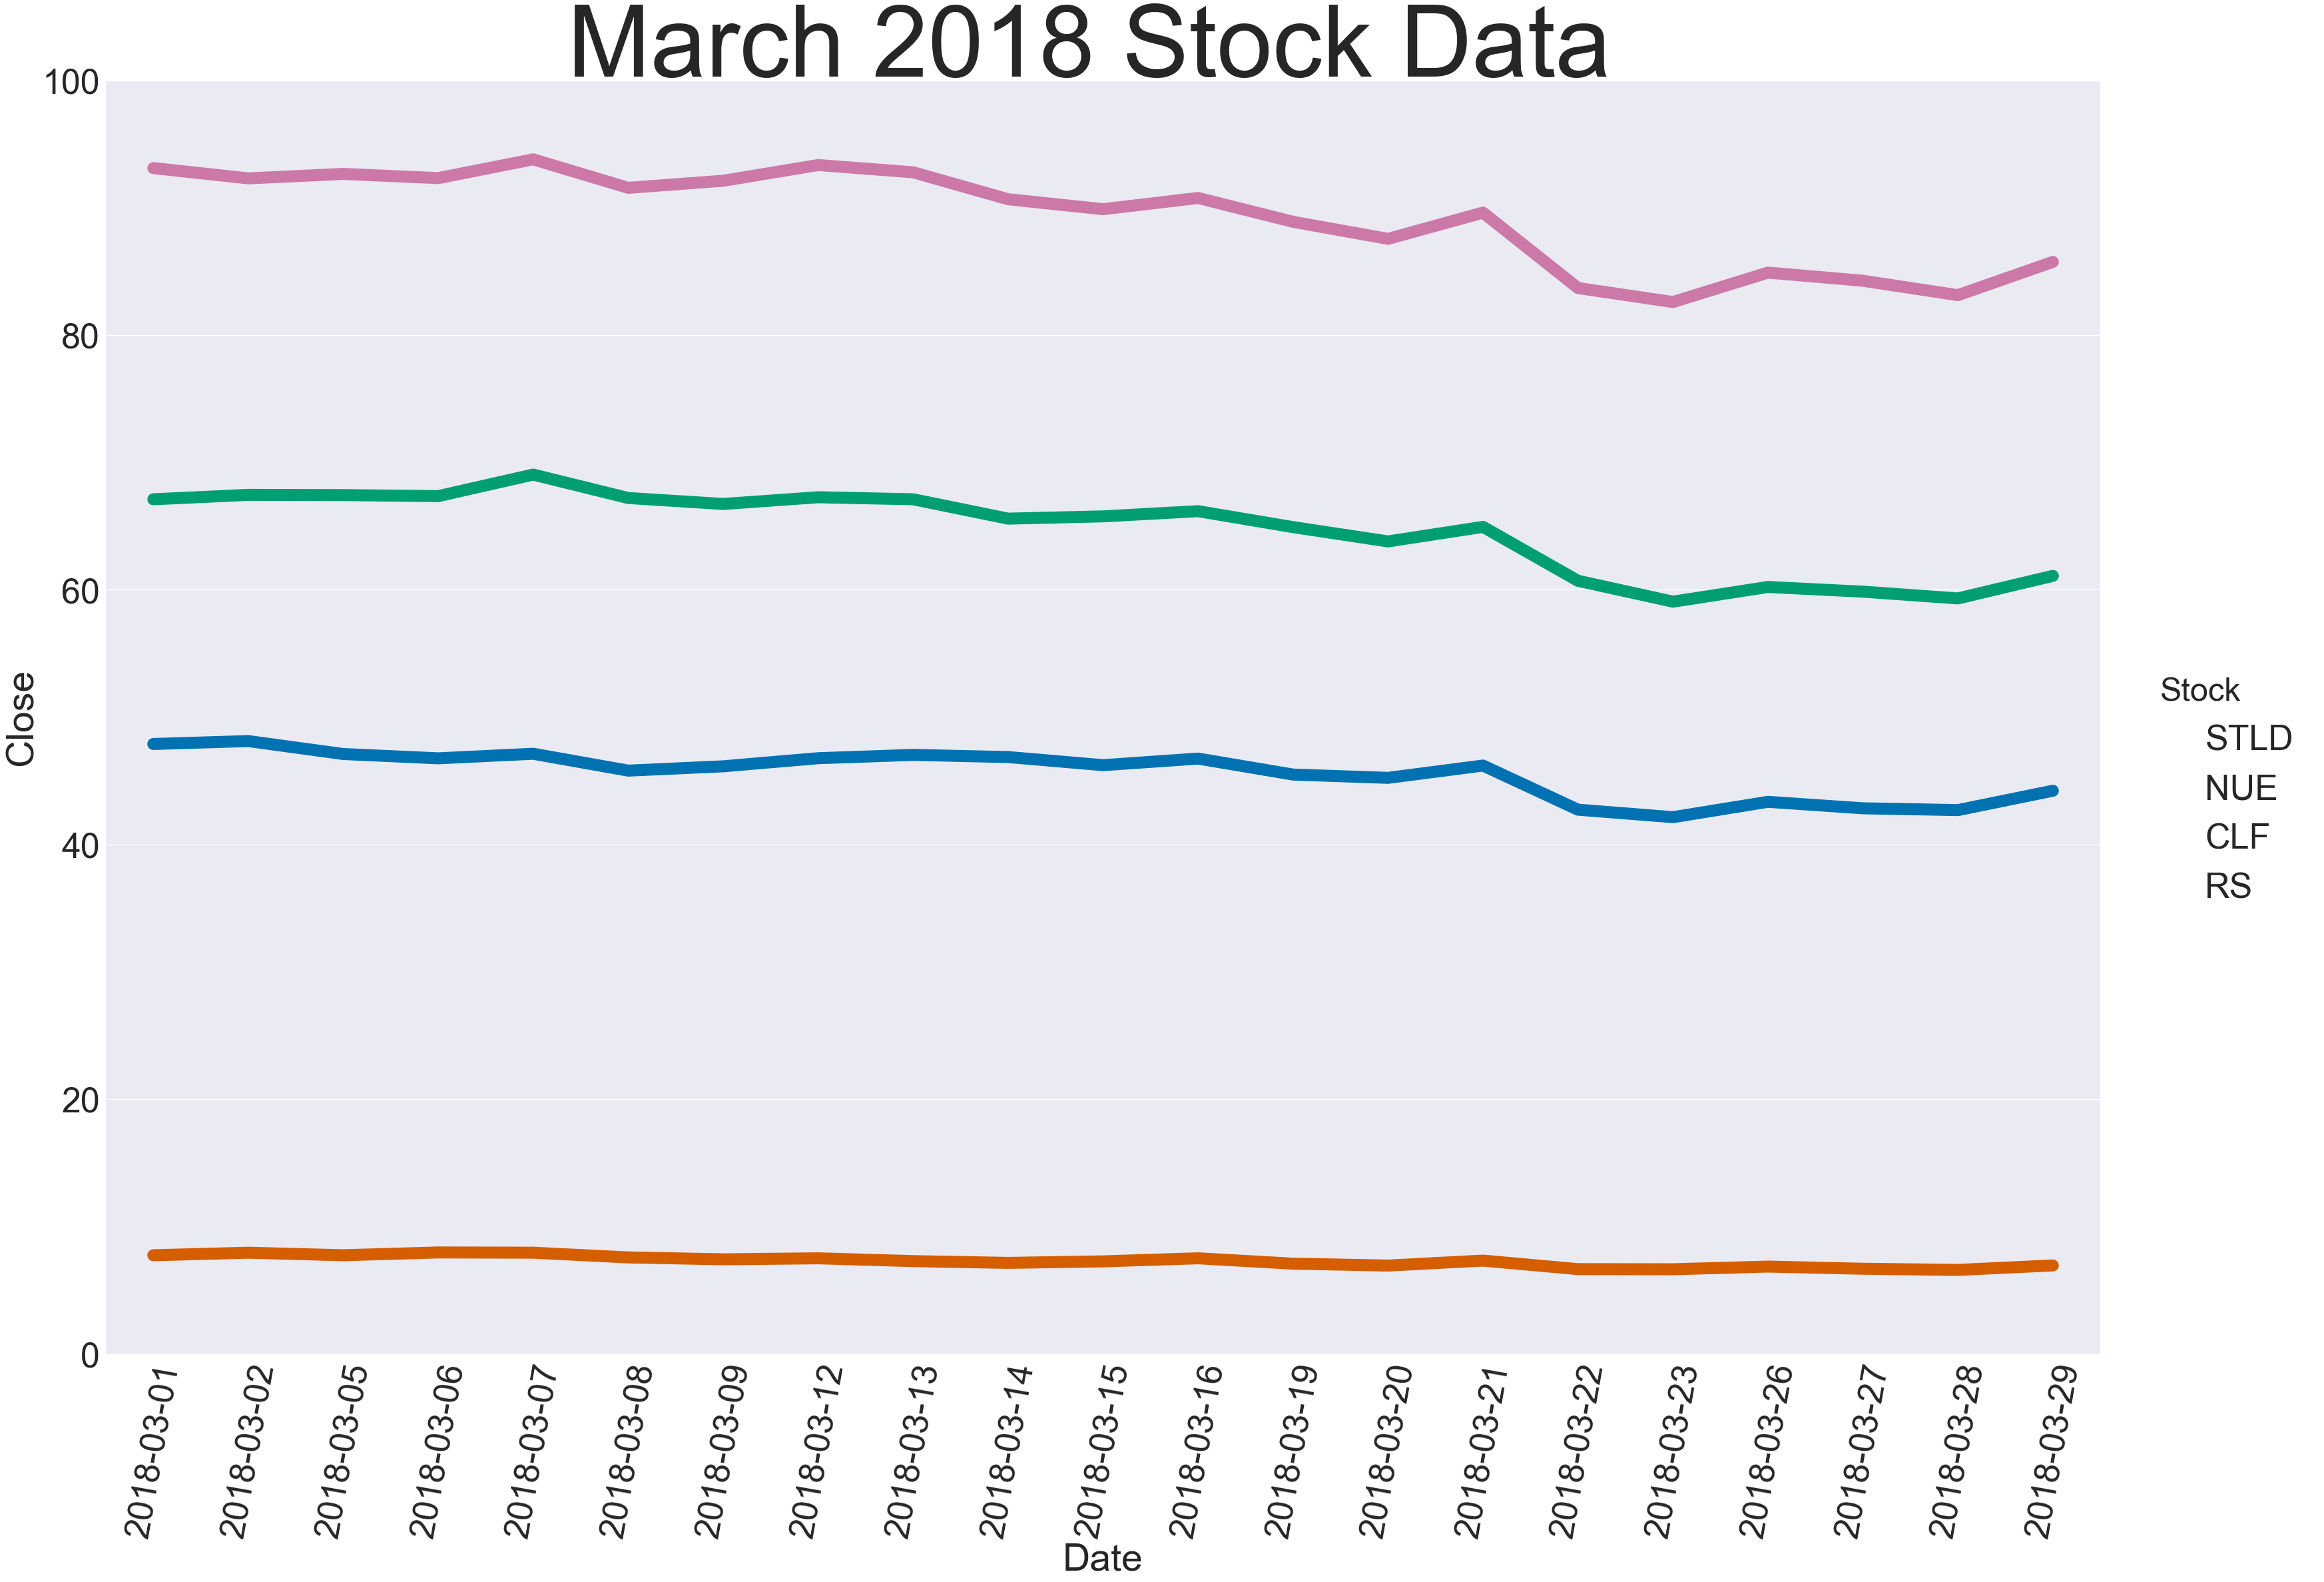

In [109]:
sns.set(context = 'talk', style = 'darkgrid', palette ='colorblind', font = 'sans-serif', font_scale = 4, rc = {'lines.linewidth': 10}, color_codes = False)
g = sns.factorplot('Date', 'Close', hue = 'Stock', data = stock_final, markers = '', size = 30, aspect = 1.5)
g.set_xticklabels(rotation=80)
plt.ylim(0, 100)

plt.title('March 2018 Stock Data ', fontsize = 150)
plt.show()

In [110]:
range_one

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19', '2018-01-22', '2018-01-23',
               '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-29',
               '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-15', '2018-02-16', '2018-02-19', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02',
               '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-12', '2018-03-13', '2018-03-14',
               '2018-03-15', '2018-03-16', '2018-03-19', '2018-03-20',
      

In [111]:
dates

['2018-01-02',
 '2018-01-03',
 '2018-01-04',
 '2018-01-05',
 '2018-01-08',
 '2018-01-09',
 '2018-01-10',
 '2018-01-11',
 '2018-01-12',
 '2018-01-15',
 '2018-01-16',
 '2018-01-17',
 '2018-01-18',
 '2018-01-19',
 '2018-01-22',
 '2018-01-23',
 '2018-01-24',
 '2018-01-25',
 '2018-01-26',
 '2018-01-29',
 '2018-01-30',
 '2018-01-31',
 '2018-02-01',
 '2018-02-02',
 '2018-02-05',
 '2018-02-06',
 '2018-02-07',
 '2018-02-08',
 '2018-02-09',
 '2018-02-12',
 '2018-02-13',
 '2018-02-14',
 '2018-02-15',
 '2018-02-16',
 '2018-02-19',
 '2018-02-20',
 '2018-02-21',
 '2018-02-22',
 '2018-02-23',
 '2018-02-26',
 '2018-02-27',
 '2018-02-28',
 '2018-03-01',
 '2018-03-02',
 '2018-03-05',
 '2018-03-06',
 '2018-03-07',
 '2018-03-08',
 '2018-03-09',
 '2018-03-12',
 '2018-03-13',
 '2018-03-14',
 '2018-03-15',
 '2018-03-16',
 '2018-03-19',
 '2018-03-20',
 '2018-03-21',
 '2018-03-22',
 '2018-03-23',
 '2018-03-26',
 '2018-03-27',
 '2018-03-28',
 '2018-03-29',
 '2018-03-30']